In [ ]:
# Description: Plot Figure 1 (model bottom topography map).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        April/2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap

In [3]:
def near(x, x0):
    return np.abs(x - x0).argmin()

In [4]:
def bmap_antarctica(ax, resolution='i'):
	"""
	Full Antartica basemap (Polar Stereographic Projection).
	"""
	m = Basemap(boundinglat=-60,
	            lon_0=0,
	            projection='spstere',
	            resolution=resolution,
	            ax=ax)

	m.fillcontinents(color='0.9', zorder=13)
	m.drawcoastlines(zorder=14)
	m.drawmapboundary(zorder=-9999)
	m.drawmeridians(np.arange(-180, 180, 30), linewidth=0.1, labels=[1, 1, 1, 1], zorder=12)
	m.drawparallels(np.arange(-70, -50, 10), linewidth=0.1, labels=[0, 0, 0, 0], zorder=12)

	return m

In [5]:
# Load model grid and topography.
plt.close('all')

head_data = "../../data_reproduce_figs/"
segments = ["A-B", "WAP", "Weddell", "W-EA", "E-EA", "Ross"]

nc = Dataset(head_data + 'POP-dzu_dzt_kzit_subsetSO.nc')
lont, latt = nc['TLONG'][:], nc['TLAT'][:]

fh = head_data + 'POP_topog.nc'
nch = Dataset(fh)
xt, yt = nch['TLONG'][:], nch['TLAT'][:]
HT = nch['HT'][:]*1e-5 # [km].

# Get isobath indices.
fisobs = head_data + 'isobaths.nc'
ncx = Dataset(fisobs)
iisob, misob, oisob = 800, 1000, 2500
xi = ncx["%d m isobath (T-points)"%iisob]['xiso'][:]
yi = ncx["%d m isobath (T-points)"%iisob]['yiso'][:]
di = ncx["%d m isobath (T-points)"%iisob]['diso'][:]
xm = ncx["%d m isobath (T-points)"%misob]['xiso'][:]
ym = ncx["%d m isobath (T-points)"%misob]['yiso'][:]
dm = ncx["%d m isobath (T-points)"%misob]['diso'][:]
xo = ncx["%d m isobath (T-points)"%oisob]['xiso'][:]
yo = ncx["%d m isobath (T-points)"%oisob]['yiso'][:]
do = ncx["%d m isobath (T-points)"%oisob]['diso'][:]

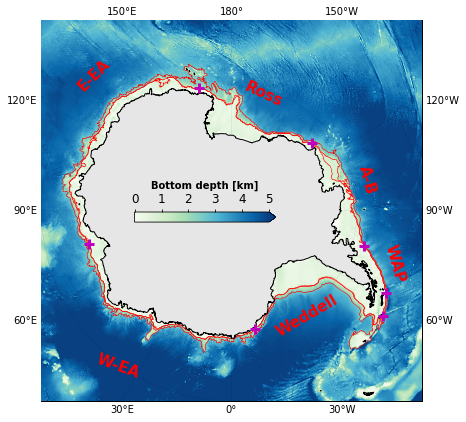

In [6]:
# Plot map.
fig, ax = plt.subplots(figsize=(7, 7))
m = bmap_antarctica(ax)

ctmin, ctmax = 0, 5
cs1 = m.pcolormesh(xt, yt, HT, vmin=ctmin, vmax=ctmax, cmap=plt.cm.GnBu, latlon=True)

# Plot isobaths.
fi = ~np.logical_or(xi<=-179.9, xi>179.9)
fm = ~np.logical_or(xm<=-179.9, xm>179.9)
fo = ~np.logical_or(xo<=-179.9, xo>179.9)
m.plot(xi[fi], yi[fi], 'r', linewidth=0.5, latlon=True)
m.plot(xm[fm], ym[fm], 'r', linewidth=0.5, latlon=True)
m.plot(xo[fo], yo[fo], 'r', linewidth=0.5, latlon=True)

# Plot segment names.
kwtxt = dict(fontsize=15, color='r', fontweight='black', zorder=999, ha='center', va='center')
txtrotang = {'A-B':-75, 'WAP':-75, 'Weddell':30, 'W-EA':-20, 'E-EA':45, 'Ross':-25}

xtseg = {'A-B':-5.85293e6,
        'WAP':-6.35176e6,
        'Weddell':-4.76289e6,
        'W-EA':-1.38194e6,
        'E-EA':-938537,
        'Ross':-3.98694e6}
ytseg = {'A-B':-3.97585e6,
        'WAP':-2.47936e6,
        'Weddell':-1.53713e6,
        'W-EA':-631850,
        'E-EA':-5.86032e6,
        'Ross':-5.50929e6}

# Plot segment zonal limits.
kwmarker = dict(marker="+", ms=10, mew=3, mfc="m", mec="m", latlon=True, zorder=999)

fl, fr = near(xm, -130), near(xm, -75)
m.plot(xm[fl], ym[fl], **kwmarker)
m.plot(xm[fr], ym[fr], **kwmarker)

fr = near(xm, -55)
m.plot(xm[fr], ym[fr], **kwmarker)

fl, fr = near(xm, -62), near(xm, -11)
m.plot(xm[fl], ym[fl], **kwmarker)
m.plot(xm[fr], ym[fr], **kwmarker)

fr = near(xm, 77)
m.plot(xm[fr], ym[fr], **kwmarker)

fr = near(xm, 165)
m.plot(xm[fr], ym[fr], **kwmarker)

for seg in segments:
    ax.text(xtseg[seg], ytseg[seg], seg, rotation=txtrotang[seg], **kwtxt)

# Colorbar.
cbaxes = fig.add_axes([0.32, 0.48, 0.28, 0.02])
cb = fig.colorbar(mappable=cs1, cax=cbaxes, orientation='horizontal', extend='max', format="%d")
cb.set_ticks([0, 1, 2, 3, 4, 5])
cb.ax.xaxis.set_tick_params(labelsize=12, rotation=0)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
cb.set_label('Bottom depth [km]', fontsize=10, fontweight='black')

plt.show()
fig.savefig("fig01.png", dpi=300, bbox_inches='tight')